# Gaussian Process for Event likelihoods

## Preliminary steps

### Loading necessary packages

In [1]:
using Plots
using AugmentedGaussianProcesses
using Distributions

## Creating some random data

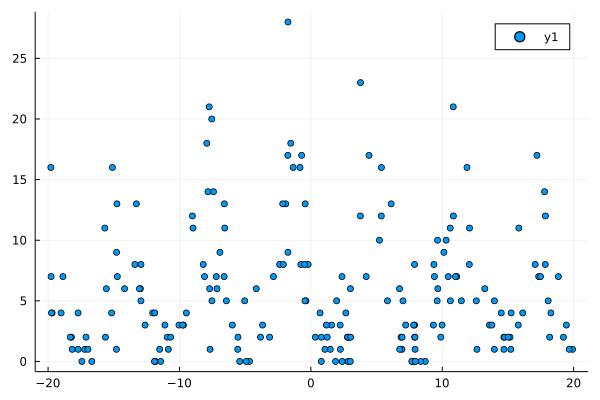

In [2]:
n_data = 200
X = (rand(n_data) .- 0.5) * 40
r = 5.0
Y = rand.(NegativeBinomial.(r, AGP.logistic.(sin.(X))))
scatter(X, Y)

## Run GP model with negative binomial likelihood to learn p

In [3]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_negbinomial = VGP(
    X, Y, kernel, NegBinomialLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_negbinomial, 20)

[ Info: Starting training Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:02
  iter:  20
  ELBO:  -541.911679977779
[ Info: Training ended after 20 iterations. Total number of iterations 20
  3.119902 seconds (6.19 M allocations: 409.012 MiB, 4.59% gc time, 97.28% compilation time)


(Variational Gaussian Process with a Negative Binomial Likelihood (r = 5.0) infered by Analytic Variational Inference , (local_vars = (c = [0.28978121551393854, 0.2891198125497969, 0.21895425093347626, 0.4495724348457891, 0.44287891257350576, 0.4944034803730735, 0.4489197409249923, 0.2131651523676139, 0.2589984715634308, 0.4164486741119083  …  0.23864354646699268, 0.6276905697100544, 0.47597142819206806, 0.587551041374798, 0.6716664499853957, 0.5511644434239806, 0.1618835697474955, 0.21401064009672174, 0.47683195186097765, 0.3993970472298916], θ = [9.434074793436725, 8.937826954961585, 3.48608393000828, 2.950471954086217, 2.951907639306134, 8.821046866872855, 8.360069664642477, 4.4830373049519885, 6.961130594483382, 11.336629473902313  …  2.9858429345083914, 2.4210276364589056, 2.4538476283959523, 4.860957899549774, 2.410068341965329, 6.828016365530303, 4.989109252155405, 3.486702405462287, 3.9258948932305704, 12.82990169173782]), opt_state = (NamedTuple(),), hyperopt_state = (NamedTup

## Running the same model but with a Poisson likelihood

In [4]:
kernel = SqExponentialKernel() ∘ ScaleTransform(1.0)
m_poisson = VGP(
    X, Y, kernel, PoissonLikelihood(r), AnalyticVI(); optimiser=false, verbose=2
)
@time train!(m_poisson, 20)

[ Info: Starting training Variational Gaussian Process with a Poisson Likelihood (λ = 5.0) infered by Analytic Variational Inference  with 200 samples, 1 features and 1 latent GP
Training Progress: 100%|████████████████████████████████| Time: 0:00:01
  iter:  20
  ELBO:  -677.6380306529129
[ Info: Training ended after 20 iterations. Total number of iterations 20
  2.395559 seconds (4.22 M allocations: 314.436 MiB, 2.85% gc time, 95.90% compilation time)


(Variational Gaussian Process with a Poisson Likelihood (λ = 12.879112837342964) infered by Analytic Variational Inference , (local_vars = (c = [0.22270010439897422, 0.2270040815807608, 0.1712956542244658, 0.6201323450258691, 0.6055071274940618, 0.4994962587617005, 0.4417495283952982, 0.1879970045816716, 0.18267296499469002, 0.4000779874997906  …  0.3753052144701712, 0.7593257004990515, 0.6597687762593761, 0.7614786531471367, 0.8304287315604154, 0.5757462023165294, 0.159086473201074, 0.1449650820665304, 0.6565342819404824, 0.3793720081699005], θ = [9.894544312340784, 9.379896167659158, 4.195223364144533, 4.494374721831213, 4.461740969076991, 8.768632962461105, 8.427616231448045, 5.2611814338828475, 7.509950951798693, 11.458644052898045  …  4.196950912162683, 4.0946212807291005, 4.0477605108226395, 6.516472388873375, 4.198447694759438, 6.649148263005266, 5.824399586708028, 4.147361518417912, 5.499332895434476, 12.983493763762164], γ = [5.870808309123152, 5.840282240703723, 6.41095288343

Prediction and plot function on a grid
Create a grid and compute prediction on it

In [5]:
function compute_grid(model, n_grid=50)
    mins = -20
    maxs = 20
    x_grid = range(mins, maxs; length=n_grid) # Create a grid
    y_grid, sig_y_grid = proba_y(model, reshape(x_grid, :, 1)) # Predict the mean and variance on the grid
    return y_grid, sig_y_grid, x_grid
end

compute_grid (generic function with 2 methods)

Plot the data as a scatter plot

In [6]:
function plot_data(X, Y)
    return Plots.scatter(X, Y; alpha=0.33, msw=0.0, lab="", size=(800, 500))
end

function plot_model(model, X, Y, title=nothing)
    n_grid = 100
    y_grid, sig_y_grid, x_grid = compute_grid(model, n_grid)
    p = plot_data(X, Y)
    Plots.plot!(
        p,
        x_grid,
        y_grid;
        ribbon=2 * sqrt.(sig_y_grid), # Plot 2 std deviations
        title=title,
        color="red",
        lab="",
        linewidth=3.0,
    )
    return p
end;

## Comparison between the two likelihoods

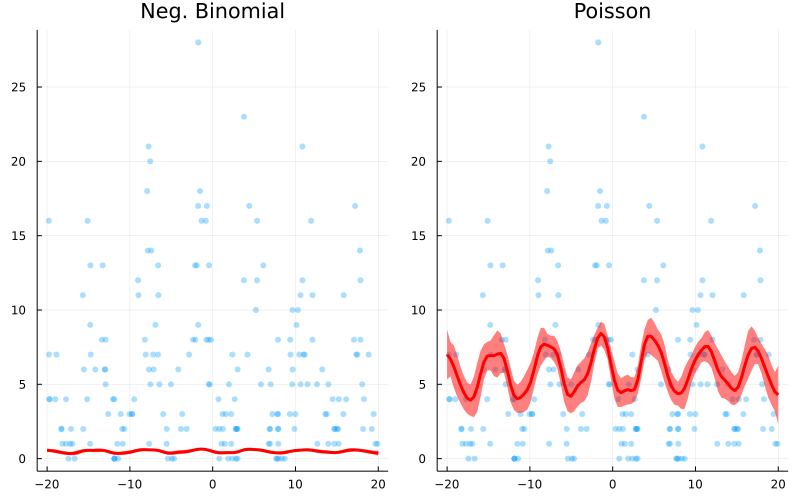

In [7]:
Plots.plot(
    plot_model.(
        [m_negbinomial, m_poisson], Ref(X), Ref(Y), ["Neg. Binomial", "Poisson"]
    )...;
    layout=(1, 2),
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*